# Thermodynamic surfaces
### Neshyba, 2021

## Partial derivatives
Partial derivatives of state functions are ubiquitous in thermodynamics. One idea we've encountered already is that the slope of the pressure "in the temperature direction" can be expressed formally as

$$
\Big( \dfrac {\partial P}{\partial T} \Big) _V \ \ \ \ (1)
$$ 

Likewise, the slope of the pressure "in the volume direction" can be expressed formally as 

$$
\Big( \dfrac {\partial P}{\partial V} \Big) _T \ \ \ \ (2)
$$

Before, we looked at these quantities as individual slices (isochoric and isothermal). Now we're going to be looking at them as full-blown thermodynamic surfaces!


## Obtaining partial derivatives from state functions
We've already seen that one method of taking partial derivatives is *numerical*. Another way is *analytical*. When do you know which method to employ?

1. Suppose somebody has measured $P(T,V)$ for a (discreet) set of of temperatures and volumes, and put those data in some files (like Pgrid.txt, etc.). In that case, you have to get the partial derivatives of $P$ *numerically*. You know how to do that for slices, but since we're trying to get entire thermodynamic surfaces, we'll need instruct np.diff whether to operate on all of $P(T,V)$ too. More precisely, to get Eq. (1) we'd instruct np.diff to work across *rows* ("axis 0"), while to get Eq. (2) we'd instruct np.diff to work across *columns* ("axis 1"). This is all quite fast on a computer -- you just have to know what you want.
2. Suppose you have an algebraic expression for $P(T,V)$ -- like the ideal gas law or the van der Waals law. In that case, you'd need to use calculus to evaluate Eqs. (1) and (2). 


## State space variables as state functions
State-space *variables* like $T$ and $V$ can be state functions just as well as $P$ can, it just kinda depends on how you look at it. In other words, if we're working with an ideal gas, we could talk about any one of these:

$$
P(T,V)=\dfrac{nRT}V  \\
V(T,P)=\dfrac{nRT}P  \\
T(P,V)=\dfrac{PV}{nR}
$$

State-space variables can even be state functions *of themselves*, as in $T(T,V)$. And while there's not much information content in, say, a graph of $T(T,V)$, it can still be useful to look at visually, so we understand clearly what the state space looks like. This will also help us understand the "no-brainer" rules of partial derivatives. 


## The "no-brainer" rules of partial derivatives
Consider for a moment the partial derivative 

$$
\Big( \dfrac {\partial T}{\partial T} \Big) _V \ \ \ \ (3)
$$

How, you may wonder, does the temperature of a gas change when you change its ... temperature ...? The answer is, perfectly in sync! "No-brainer #1" is $\Big( \dfrac {\partial T}{\partial T} \Big) _V=1$. We'd expect all state variables to behave just like this, like $\Big( \dfrac {\partial V}{\partial V} \Big) _T=1$, and so on. The second "no-brainer" is of the form

$$
\Big( \dfrac {\partial T}{\partial V} \Big) _T \ \ \ \ (4)
$$

How, you may wonder, can the temperature of a gas change when you change its volume *while holding the temperature constant*? Well, it can't. "No-brainer #2" is  $\Big( \dfrac {\partial T}{\partial V} \Big) _T=0$. For the same reason, we'd also expect $\Big( \dfrac {\partial V}{\partial T} \Big) _V=0$, and so on.

## Other notes and caveats
Sometimes, the partial derivative is in fact the property we measure. For example, we can easily measure the heat capacity of a substance, $C_P$, with simple lab tools like a thermometer and a hot plate. $C_P$ is also the partial derivative of what's called the enthalpy of a substance: $C_P = \Big( \dfrac {\partial H}{\partial T} \Big) _P$. With the help of integral calculus, we can "go the other way" from what we're doing here, and use partial derivatives to infer a state function. We'll tackle that later on.

## Learning Goals
1. Explain circumstances that dictate whether one would need to take a numerical or analytical derivative.
1. Given an algebraic form of a state function, obtain an analytical expression for its partial derivatives.
1. Given a numerical representation of a state function, obtain and plot its partial derivatives.
1. State the values of the two "no-brainer" partials, and how to recognize them.

In [1]:
# Import resources - execute 2x if you want interactive graphics
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

### Loading gridded state-space variables and functions
Use numpy's "loadtxt" function to load the state space variables $T$ and $V$ and state function $P$, from files Tgrid.txt, Vgrid.txt, and Pgrid.txt. Call the variables Tgrid, Vgrid, and Pgrid.

In [2]:
### BEGIN SOLUTION
# Load the temperature data and attach units
Tgrid = np.loadtxt('Tgrid.txt')
Tgrid = AssignQuantity(Tgrid,'K')
print(np.shape(Tgrid))

# Load the volume data and attach units
Vgrid = np.loadtxt('Vgrid.txt')
Vgrid = AssignQuantity(Vgrid,'L')
print(np.shape(Vgrid))

Pgrid = np.loadtxt('Pgrid.txt')
Pgrid = AssignQuantity(Pgrid,'atm')
print(np.shape(Pgrid))

### END SOLUTION

(51, 42)
(51, 42)
(51, 42)


### Visualizing the thermodynamic surface
In the cell below, make a 3d graph (using plot_surface) of $P(T,V)$. Color it "plum" ("p" for pressure).

Text(0.5, 0, 'P standard_atmosphere')

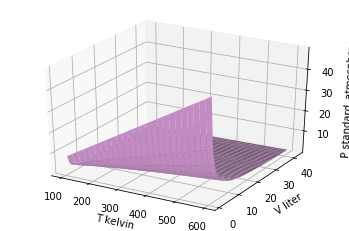

In [3]:
### BEGIN SOLUTION
# Prepping the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "P "+str(Pgrid.units)

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Pgrid, color='plum') # Make the mesh plot P(T,V)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Using dF_dx to get $\Big( \dfrac {\partial P}{\partial T} \Big) _V$
The cell below shows how to use the numerical derivative function dF_dx to evaluate $\Big( \dfrac {\partial P}{\partial T} \Big) _V$. Some (hopefully helpful) points about this:

- F corresponds to the pressure.
- x corresponds to the temperature.
- The function dF_dx (from PchemLibrary) takes differences along the first axis (axis=0) of the grid (which corresponds to temperature in our state space). It returns new state space grids (here called Tgridnew, Vgridnew) that are shorter in the "x" direction -- which is needed for plotting, as you saw before.

Shape of partial derivative = (50, 42)
Units of partial derivative = standard_atmosphere / kelvin


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'dP/dT standard_atmosphere / kelvin')

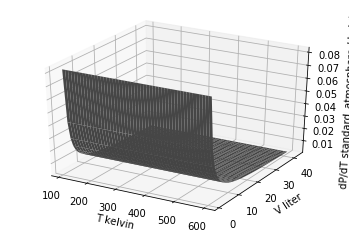

In [4]:
# Get a numerical partial derivative: (dP/dT) holding V constant
Tgridnew, Vgridnew, dPgrid_dT = PL.dF_dx([Tgrid,Vgrid],Pgrid)

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dT "+str(dPgrid_dT.units)

# Graph the derivative
ax = PL.plot_surface(Tgridnew, Vgridnew, dPgrid_dT, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn: Using dF_dy to get $\Big( \dfrac {\partial P}{\partial V} \Big) _T$


In the cell below, you'll use the numerical derivative function dF_dy to evaluate $\Big( \dfrac {\partial P}{\partial V} \Big) _T$. Some (hopefully helpful) points about this:

- y corresponds to the volume. 
- The function dF_dy takes differences along the second axis (axis=1) of the grid (which corresponds to volume in our state space). Like dF_dx, it returns new state space grids (Tgridnew, Vgridnew), but now these are shorter in the "y" direction. When you go to plot $\Big( \dfrac {\partial P}{\partial V} \Big) _T$, be sure to use those new state space grids. 

Shape of partial derivative = (51, 41)
Units of partial derivative = standard_atmosphere / liter


Text(0.5, 0, 'dP/dV standard_atmosphere / liter')

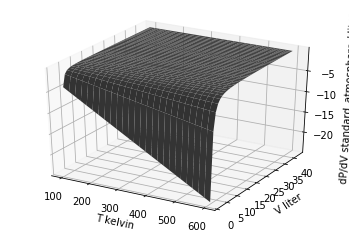

In [5]:
### BEGIN SOLUTION
# Get a numerical partial derivative: (dP/dV) holding T constant
Tgridnew, Vgridnew, dPgrid_dV = PL.dF_dy([Tgrid,Vgrid],Pgrid)

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dV "+str(dPgrid_dV.units)

# Graph the derivative
ax = PL.plot_surface(Tgridnew, Vgridnew, dPgrid_dV, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Your turn: Analytical partial derivatives of the ideal gas
As mentioned above, if you have an algebraic expression for the pressure of a gas as a function of its temperature and volume, it's a matter of calculus to find analytical expressions for its partial derivatives. So, your challenge is, 

1. On paper, do the calculus to get algebraic expressions for $\Big( \dfrac {\partial P}{\partial V} \Big) _T$ for an ideal gas.
1. In the cell below, calculate this partial on the state space we've been working with (Tgrid and Vgrid). 
1. Make a mesh plot of it.

You'll know if you have it right if it looks like one of the *numerical* results you got above.

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole


Text(0.5, 0, 'dP/dV standard_atmosphere / liter')

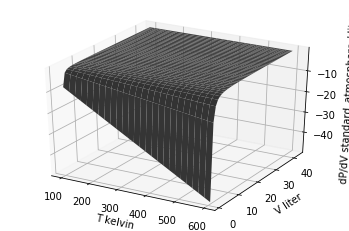

In [6]:
### BEGIN SOLUTION

# Moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

# Getting dP/dV
dPgrid_dV_analytical = -n*R*Tgrid/Vgrid**2

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dV "+str(dPgrid_dV_analytical.units)

# Graph the derivative
ax = PL.plot_surface(Tgrid, Vgrid, dPgrid_dV_analytical, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### END SOLUTION

### State space variables as state functions
The next cell makes a plot of $T(T,V)$ -- it's teal-colored ("t" for "temperature"). Have a look at it to make sure it makes sense to you.

Text(0.5, 0, 'T kelvin')

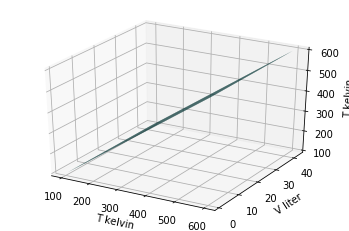

In [7]:
# Prepping the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "T "+str(Tgrid.units)

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Tgrid, color='teal') # Make the mesh plot T(T,V)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Your turn
In the next cell, make a 3d plot of $V(T,V)$. Make the color violet ("v" for "volume"). Have a look at this, especially how it differs from $T(T,V)$.

Text(0.5, 0, 'V liter')

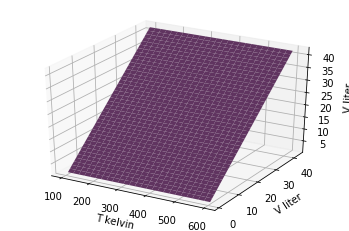

In [8]:
### BEGIN SOLUTION
# Prepping the axis labels
xlabel = "T "+str(Tgrid.units)
ylabel = "V "+str(Vgrid.units) 
zlabel = "V "+str(Vgrid.units)

# Graph the pressure
ax = PL.plot_surface(Tgrid, Vgrid, Vgrid, color='violet') # Make the mesh plot V(T,V)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### A no-brainer
Next we're going to have a look at $\Big( \dfrac {\partial T}{\partial T} \Big) _V $. 

Shape of partial derivative = (50, 42)
Units of partial derivative = dimensionless


Text(0.5, 0, 'dT/dT dimensionless')

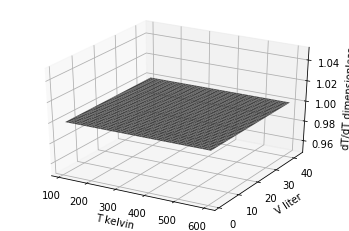

In [9]:
# Get the partial derivative
Tgridnew, Vgridnew, dTgrid_dT = PL.dF_dx([Tgrid,Vgrid],Tgrid)

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dT/dT "+str(dTgrid_dT.units)

# Graph the derivative
ax = PL.plot_surface(Tgridnew, Vgridnew, dTgrid_dT, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### Pause for analysis
The function we just plotted seems to be just a single, constant value. In the cell below, write what that value is, and which no-brainer (#1 or #2) this partial corresponds to.

### Your turn
In the cell below, calculate and plot $\Big( \dfrac {\partial T}{\partial V} \Big) _T $. 

Shape of partial derivative = (51, 41)
Units of partial derivative = kelvin / liter


Text(0.5, 0, 'dT/dV kelvin / liter')

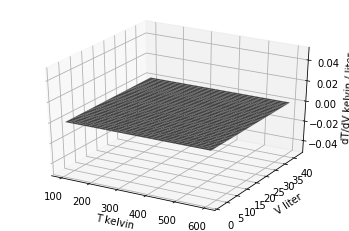

In [10]:
### BEGIN SOLUTION
# Get the partial derivative
Tgridnew, Vgridnew, dTgrid_dV = PL.dF_dy([Tgrid,Vgrid],Tgrid)

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dT/dV "+str(dTgrid_dV.units)

# Graph the derivative
ax = PL.plot_surface(Tgridnew, Vgridnew, dTgrid_dV, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)
### END SOLUTION

### Pause for analysis
If all has gone well, the function you just plotted should have a single, constant value. In the cell below, write what that value is, and which no-brainer (#1 or #2) this partial corresponds to.

### Your challenge: Analytical partial derivatives of a van der Waals gas
This is a lot like what you did previously for an ideal gas, but now you'll try it with a van der Waals gas; you can use the $a$ and $b$ values for Argon. Specifically,

1. In your paper notebook, derive an algebraic expression for $\Big( \dfrac {\partial P}{\partial V} \Big) _T$ for a van der Waals gas.
1. In the cell below, calculate this partial on the state space we've been working with (Tgrid and Vgrid). 
1. Make a mesh plot of it.

Given that Argon, as a van der Waals gas, is pretty close to ideal, you can expect these results to also look pretty similar to your previous results.

1 mole
0.082057 liter * standard_atmosphere / kelvin / mole
1.355 bar * liter ** 2 / mole ** 2
0.032 liter / mole


Text(0.5, 0, 'dP/dV standard_atmosphere / liter')

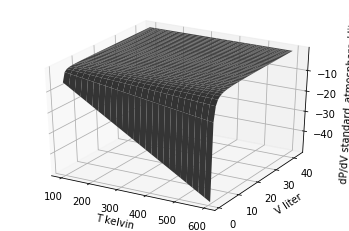

In [11]:
### BEGIN SOLUTION

# Moles, and the gas constant
n = AssignQuantity(1,"mol"); print(n)
R = AssignQuantity(0.082057,"L atm /(mol K)"); print(R)

# van der Waals constants for Argon
a = AssignQuantity(1.355,'L^2 bar / mol^2'); print(a)
b = AssignQuantity(0.032,'L /mol'); print(b)

# Getting dP/dV
dPgrid_dV_analytical = -n*R*Tgrid/(Vgrid-n*b)**2 + 2*n**2*a/Vgrid**3

# Prepping the axis labels
xlabel = "T "+str(Tgridnew.units)
ylabel = "V "+str(Vgridnew.units) 
zlabel = "dP/dV "+str(dPgrid_dV_analytical.units)

# Graph the derivative
ax = PL.plot_surface(Tgrid, Vgrid, dPgrid_dV_analytical, color='gray')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_zlabel(zlabel)

### END SOLUTION

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page